This notebook focuses on the creating web crawler which extracts structured information from wikipedia info boxes and save in desired text format. 

In [1]:
# import REquired packages
import pandas as pd
from bs4 import BeautifulSoup
import requests
import wget

In [2]:
#set the url and send request
url="https://en.wikipedia.org/wiki/Vienna"
page=requests.get(url)

#Using Beautifulsoup to parse and fetch
soup=BeautifulSoup(page.text,'html.parser')


1. Visit the above url.

2. Right-click on the webpage, click Inspect, and you'll see the innards of that site: its source code, the images and CSS that form its design, the fonts and icons it uses, the Javascript code that powers animations, and more.

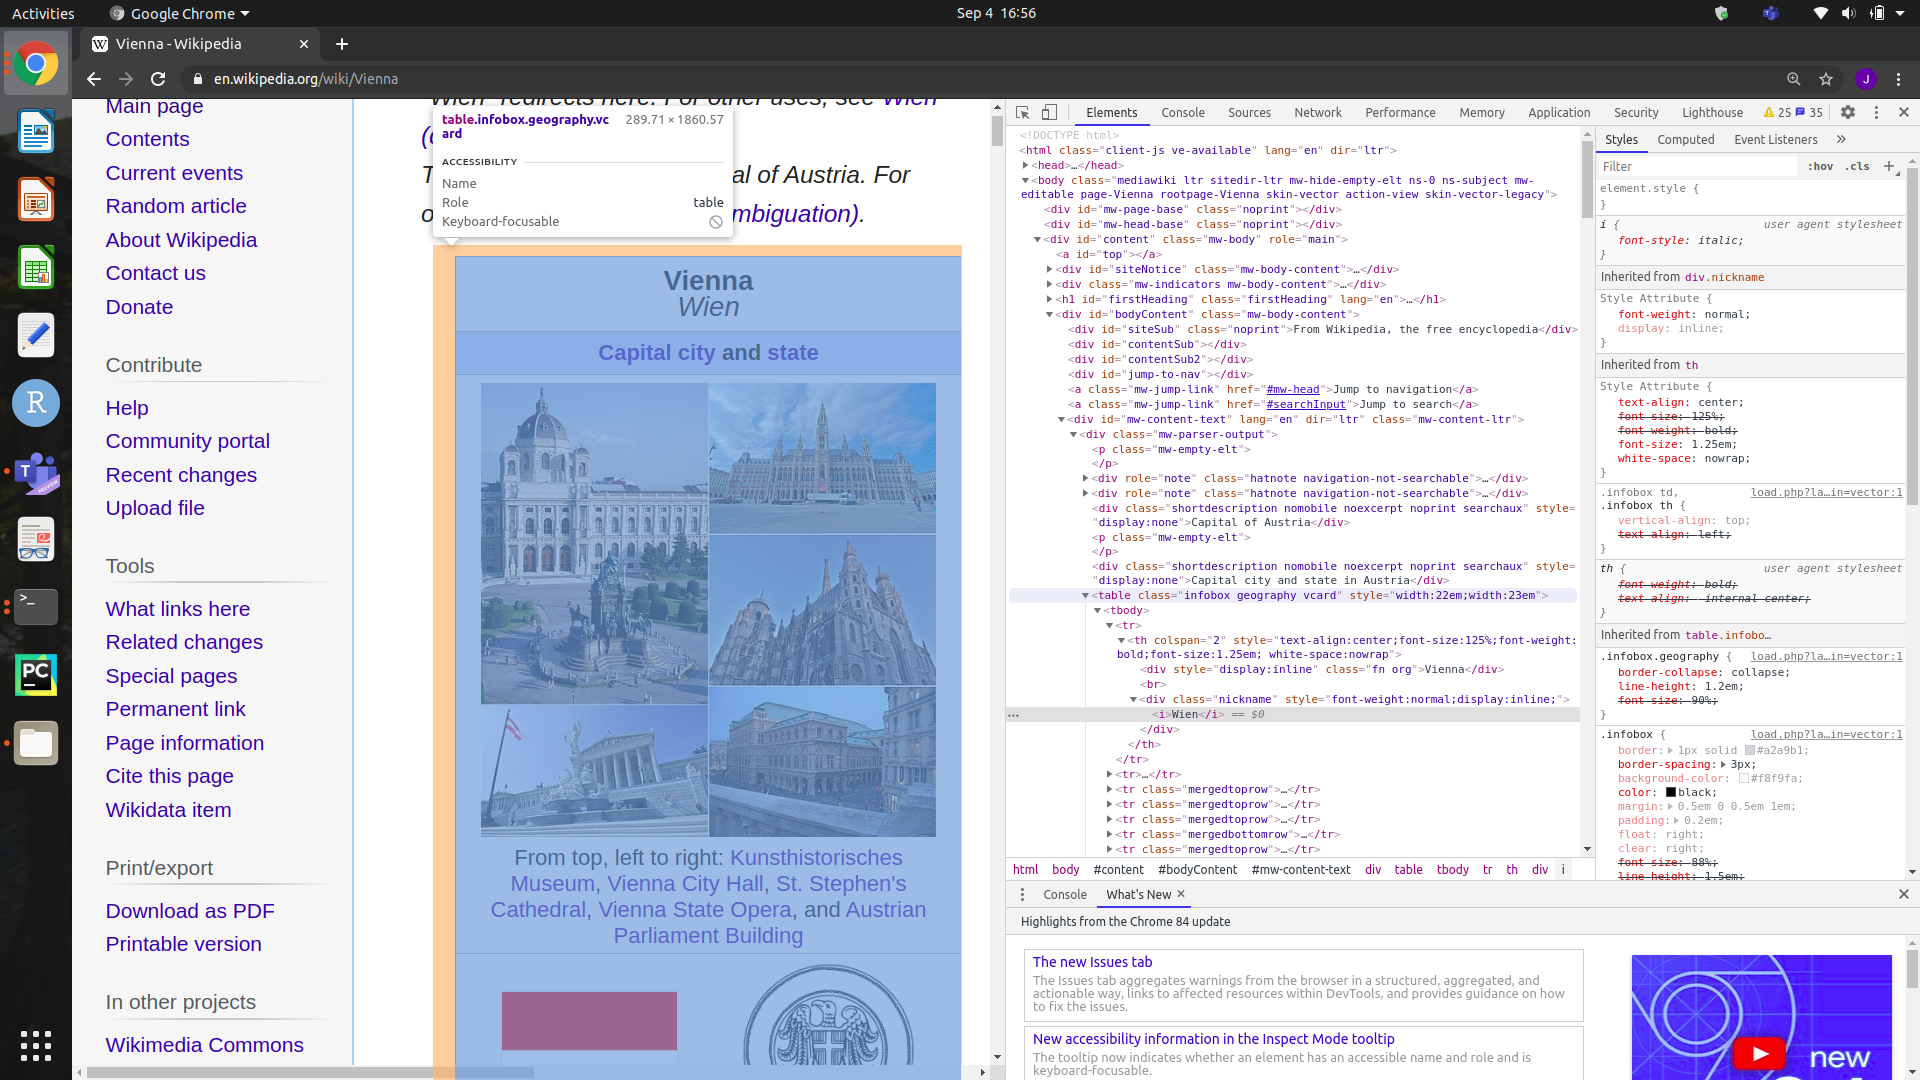

3. Head to the infobox table. Find the tag which includes the entire infobox table.

In [3]:
infobox=soup.find('table', class_='infobox geography vcard')

In [4]:
#read th tag
th_tag=[]
th_tag_var=infobox.find_all('th',scope='row')
for item in th_tag_var:
    th_tag.append(item.text)
    
#print at any instance to view the result
print(th_tag)

['Country', '\xa0•\xa0Body', '\xa0•\xa0Mayor and Governor', '\xa0•\xa0Vice Mayors', '\xa0•\xa0Capital city and state', '\xa0•\xa0Land', '\xa0•\xa0Water', 'Elevation', '\xa0•\xa0Capital city and state', '\xa0•\xa0Rank', '\xa0•\xa0Density', '\xa0•\xa0Metro', '\xa0•\xa0Ethnicity[3][4]', 'Demonym(s)', 'Time zone', '\xa0•\xa0Summer (DST)', 'Postal code', 'ISO 3166 code', 'Vehicle registration', 'HDI (2018)', 'GDP', 'GDP per capita', 'Seats in the Federal Council', 'GeoTLD', 'Website', 'Official name', 'Type', 'Criteria', 'Designated', 'Reference\xa0no.', 'UNESCO Region', 'Endangered']


In [5]:
#read td tag
td_tag=[]
td_tag_var=infobox.find_all('td')
for item in td_tag_var:
    td_tag.append(item.text)

print(td_tag) 

['Capital city and state', "From top, left to right: Kunsthistorisches Museum, Vienna City Hall, St. Stephen's Cathedral, Vienna State Opera, and Austrian Parliament Building", '\nFlagSealCoat of arms', 'ViennaLocation within AustriaShow map of AustriaViennaLocation within EuropeShow map of Europe', 'Coordinates: 48°12′N 16°22′E\ufeff / \ufeff48.200°N 16.367°E\ufeff / 48.200; 16.367', '\xa0Austria', 'State and Municipality Diet', 'Michael Ludwig (SPÖ)', 'Birgit Hebein (Grüne)Dominik Nepp (FPÖ)', '414.78\xa0km2 (160.15\xa0sq\xa0mi)', '395.25\xa0km2 (152.61\xa0sq\xa0mi)', '19.39\xa0km2 (7.49\xa0sq\xa0mi)', '151 (Lobau) – 542 (Hermannskogel)\xa0m (495–1,778\xa0ft)', '1,888,776', '1st in Austria (6th in EU)', '4,326.1/km2 (11,205/sq\xa0mi)', '2,600,000', '61.2% Austrian38.8% Other', 'German: Wiener (m), Wienerin (f)English: Viennese', 'UTC+1 (CET)', 'UTC+2 (CEST)', '1xx0 (xx = district number)1300 (airport)1400 (United Nations)other 1yyy (postal boxes)[5]', 'AT-9', 'W', '0.940[6]very high 

In [6]:
#since the first 5 entries are not required and 26th element is empty, we remove it.
td_tag=td_tag[5:]
td_tag.pop(25)    
td_tag

['\xa0Austria',
 'State and Municipality Diet',
 'Michael Ludwig (SPÖ)',
 'Birgit Hebein (Grüne)Dominik Nepp (FPÖ)',
 '414.78\xa0km2 (160.15\xa0sq\xa0mi)',
 '395.25\xa0km2 (152.61\xa0sq\xa0mi)',
 '19.39\xa0km2 (7.49\xa0sq\xa0mi)',
 '151 (Lobau) – 542 (Hermannskogel)\xa0m (495–1,778\xa0ft)',
 '1,888,776',
 '1st in Austria (6th in EU)',
 '4,326.1/km2 (11,205/sq\xa0mi)',
 '2,600,000',
 '61.2% Austrian38.8% Other',
 'German: Wiener (m), Wienerin (f)English: Viennese',
 'UTC+1 (CET)',
 'UTC+2 (CEST)',
 '1xx0 (xx = district number)1300 (airport)1400 (United Nations)other 1yyy (postal boxes)[5]',
 'AT-9',
 'W',
 '0.940[6]very high · 1st',
 '€94 billion (2017)[7]',
 '€50,000 (2017)[7]',
 '11 / 61\n',
 '.wien',
 'www.wien.gv.at',
 'Historic Centre of Vienna',
 'Cultural',
 'ii, iv, vi',
 '2001 (25th session)',
 '1033',
 'Europe and North America',
 '2017\xa0(2017)–present[8]',
 '\n']

In [7]:
#read the image link
images = infobox.find_all('img', {'src':re.compile('.jpg')})
for image in images:
    print(str('https:')+image['src'])
    #if the link can be scraped then image can be downloaded using wget
    wget.download(str('https:')+image['src'])
    

https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Montage_of_Vienna.jpg/260px-Montage_of_Vienna.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Austria_relief_location_map.jpg/250px-Austria_relief_location_map.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Europe_relief_laea_location_map.jpg/250px-Europe_relief_laea_location_map.jpg


In [8]:
#create dataframe
final_array=[]
for var1,var2 in zip(th_tag,td_tag):
    final_array.append({'Variable1':var1,'Variable2':var2})
df=pd.DataFrame(final_array)

In [9]:
df

,Variable1,Variable2
0,Country,Austria
1,• Body,State and Municipality Diet
2,• Mayor and Governor,Michael Ludwig (SPÖ)
3,• Vice Mayors,Birgit Hebein (Grüne)Dominik Nepp (FPÖ)
4,• Capital city and state,414.78 km2 (160.15 sq mi)
5,• Land,395.25 km2 (152.61 sq mi)
6,• Water,19.39 km2 (7.49 sq mi)
7,Elevation,"151 (Lobau) – 542 (Hermannskogel) m (495–1,778..."
8,• Capital city and state,"1,888,776"
9,• Rank,1st in Austria (6th in EU)


In [10]:
#Export the dataframe 
df.to_csv('infobox.csv',index=False)
